### TODOS
- TODO: Implement volume for muscle groups. volume_chest, volume_back, etc.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('workout.csv')

### 🔴 1. Calculate Descriptive Statistics

In [5]:
'''
DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS 
DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS DESCRIPTIVE STATS 
'''

# Number of Workouts 
no_of_workouts = df['Workout Start'].unique().shape[0]

# Setup: Workout Duration
workout_duration = df.copy()
workout_duration = workout_duration.groupby(['Workout Start', 'Workout End']).sum()
workout_duration.reset_index(inplace=True)
workout_duration['Workout Start'] = pd.to_datetime(workout_duration['Workout Start'], errors='coerce')
workout_duration['Workout End'] = pd.to_datetime(workout_duration['Workout End'], errors='coerce')
workout_duration['Duration (hrs)'] = (workout_duration['Workout End'] - workout_duration['Workout Start']).dt.total_seconds() / 60

# Total Monthly Workout Duration
monthly_workout_duration = workout_duration.groupby(workout_duration['Workout Start'].dt.month).sum()
monthly_workout_duration = monthly_workout_duration.reset_index()
monthly_workout_duration = monthly_workout_duration.drop(['Weight', 'Reps', 'Kcal', 'Distance'], axis=1)
monthly_workout_duration['Duration (hrs)'] /= 60
monthly_workout_duration['Workout Start'] = monthly_workout_duration['Workout Start'].map(
    { 1 : "January",
       2 : "February",
       3 : "March",
       4 : "April",
       5 : "May",
       6 : "June",
       7 : "July",
       8 : "August",
       9 : "September",
       10 : "October",
       11 : "November",
       12 : "December"})

# Average Workout Duration
average_workout_duration = workout_duration['Duration (hrs)'].mean()



In [6]:
exercise_details = 'Incline Dumbbell Press (30°)'
df[df.Exercise == exercise_details].drop(['Workout End', 'Notes', 'Kcal', 'Distance', 'Duration', 'Category', 'Name'], axis=1)

,Workout Start,Exercise,Weight,Reps
31,2022-08-27 14:22,Incline Dumbbell Press (30°),12.0,17.0
32,2022-08-27 14:22,Incline Dumbbell Press (30°),14.0,11.0
33,2022-08-27 14:22,Incline Dumbbell Press (30°),14.0,10.0
78,2022-08-03 20:25,Incline Dumbbell Press (30°),14.0,19.0
79,2022-08-03 20:25,Incline Dumbbell Press (30°),16.0,12.0
80,2022-08-03 20:25,Incline Dumbbell Press (30°),16.0,10.0
140,2022-07-28 20:17,Incline Dumbbell Press (30°),14.0,18.0
141,2022-07-28 20:17,Incline Dumbbell Press (30°),16.0,11.0
142,2022-07-28 20:17,Incline Dumbbell Press (30°),16.0,10.0
202,2022-07-15 19:30,Incline Dumbbell Press (30°),14.0,16.0


### 🔴 1.5 Preprocessing

In [7]:

# Keep only day on date 
df['Workout Start'] = pd.to_datetime(df['Workout Start'])
df['Workout End'] = pd.to_datetime(df['Workout Start'])

# Rename
df = df.rename(columns={'Workout Start': 'Date'})


### 🔴 2. Calculate Average Weight Per Muscle Group Per Workout

In [8]:
df_avg_weight = df.groupby(['Date', 'Category', 'Exercise']).mean().head(20)
df_avg_weight = df_avg_weight.drop(['Reps', 'Kcal', 'Distance', 'Duration'], axis=1)
df_avg_weight = df_avg_weight.reset_index()
df_avg_weight

,Date,Category,Exercise,Weight
0,2022-06-06 20:45:00,Back,High Cable Row,10.000000
1,2022-06-06 20:45:00,Back,Lateral Pulldowns,35.000000
2,2022-06-06 20:45:00,Back,"Low Row (Technogym Machine, Lat Focused)",11.000000
3,2022-06-06 20:45:00,Back,"Mid Row (Lat, Technogym)",33.333333
4,2022-06-06 20:45:00,Biceps,Decline Dumbbell Curls,4.000000
5,2022-06-06 20:45:00,Biceps,Incline Dumbbell Curls,4.000000
6,2022-06-06 20:45:00,Biceps,Rope Hammer Curls,5.000000
7,2022-06-06 20:45:00,Cardio,Running,NaN
8,2022-06-06 20:45:00,Legs,Romanian Deadlifts (RDLs),40.000000
9,2022-06-06 20:45:00,Shoulders,Rear Delt Flys,1.250000


### 🔴 3. Calculate Volume Per Muscle Group Per Workout

In [9]:
'''
VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME 
VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME VOLUME 
'''


# Derive volume (reps * weight) for each exercise 
df['Volume'] = df['Weight'] * df['Reps']
df_volume = df.groupby(['Date', 'Category', 'Exercise']).sum()

df_volume = df_volume.drop(['Weight', 'Reps', 'Kcal', 'Distance', 'Duration'], axis=1)
df_cardio = pd.DataFrame(df[df.Exercise == 'Running'].groupby(['Date', 'Exercise']).sum())
df_cardio = df_cardio.drop(['Weight', 'Reps', 'Kcal'], axis=1)
# Reset Index
df_volume.reset_index(inplace=True)
df_cardio.reset_index(inplace=True)


# Remove 0 values in volume where the exercise was probably not done but was not removed either
df_volume = df_volume[df_volume.Volume != 0]
df_cardio = df_cardio[df_cardio.Distance !=0]

# Manually double single-arm / single-leg volume
ex = ['High Cable Row', 'Decline Dumbbell Curls', 'Incline Dumbbell Curls', 'Rear Delt Flys', 'High Cable Flies',  'Incline Dumbbell Press (30°)',  'Lateral Cable Raises',  'Shoulder Dumbbell Press',  'Standing Calf Raises (bodyweight)']

for i in range(df_volume.shape[0]):
    if df_volume.iloc[i].Exercise in ex:
        df_volume.iloc[i, 3] = df_volume.iloc[i, 3] * 2


# Separate PUSH PULL LEGS
df_volume_chest = df_volume[(df_volume.Category == 'Chest')]
df_volume_shoulders = df_volume[(df_volume.Category == 'Shoulders')]
df_volume_triceps = df_volume[(df_volume.Category == 'Triceps')]
df_volume_back = df_volume[(df_volume.Category == 'Back')]
df_volume_biceps = df_volume[(df_volume.Category == 'Biceps')]
df_volume_legs = df_volume[(df_volume.Category == 'Legs')]
df_volume_abs = df_volume[(df_volume.Category == 'Abs')]

# 
df_workout_volume = pd.DataFrame(df_volume.groupby(['Category', 'Date']).sum())
df_workout_volume.reset_index(inplace=True)

### 🔴 4. Plot Statistics and Volume

In [10]:
# TODO: plot average weight per exercise too along with volume. This can be insightful because low weight high reps tends to achieve more volume. 
# TODO: plot % volume increase average for each exercise. This demonstrates progressive overload better than pure volume that can greately differ between RDLs and lateral raises.

In [16]:
figsize=(12,4)
legendsize=10

def plot_volume():
    # Plot by muscle group
    muscle_groups = zip([df_volume_chest,
                  df_volume_shoulders,
                  df_volume_triceps,
                  df_volume_back,
                  df_volume_biceps,
                  df_volume_legs,
                  df_volume_abs],
                ['Chest', 
                 'Shoulders', 
                 'Triceps',
                'Back',
                'Biceps',
                'Legs'])


    for data, name in muscle_groups:
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=figsize)
        sns.lineplot(x='Date', y='Volume', data=data, ci=None, hue='Exercise')
        sns.scatterplot(x='Date', y='Volume', data=data, ci=None, marker='o', s=70, hue='Exercise')
        plt.xlabel('Date', fontsize=15)
        plt.ylabel('Volume', fontsize=15)
        plt.title(f'{name} Workout Volume Progression', fontsize=20)
        plt.legend(loc='upper left', prop={'size': legendsize})
        plt.show()
        
def plot_cardio(data):
    # Plot Cardio
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    sns.barplot(x='Date', y='Distance', data=data, ci=None, hue='Exercise')
    #sns.scatterplot(x='Date', y='Distance', data=data, ci=None, marker='o', s=70, hue='Exercise')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Distance', fontsize=15)
    plt.title(f'Cardio (Distance)', fontsize=20)
    plt.show()

    sns.set_theme(style="darkgrid")
    plt.figure(figsize=figsize)
    sns.barplot(x='Date', y='Duration', data=data, ci=None, hue='Exercise')
    #sns.scatterplot(x='Date', y='Duration', data=data, ci=None, marker='o', s=70, hue='Exercise')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Duration', fontsize=15)
    plt.title('Cardio (Duration)', fontsize=20)
    plt.show()

In [17]:
df_volume_chest.sort_values('Date')

,Date,Category,Exercise,Volume
11,2022-06-08 20:46:00,Chest,Flat Chest Press (Technogym),1220.00
12,2022-06-08 20:46:00,Chest,High Cable Flies,657.50
13,2022-06-08 20:46:00,Chest,Incline Dumbbell Press (30°),944.00
37,2022-06-17 19:30:00,Chest,Flat Chest Press (Technogym),1792.50
38,2022-06-17 19:30:00,Chest,High Cable Flies,615.00
39,2022-06-17 19:30:00,Chest,Incline Dumbbell Press (30°),792.00
63,2022-06-22 20:21:00,Chest,Flat Chest Press (Technogym),1665.00
64,2022-06-22 20:21:00,Chest,High Cable Flies,735.00
65,2022-06-22 20:21:00,Chest,Incline Dumbbell Press (30°),888.00
71,2022-06-27 20:32:00,Chest,Flat Chest Press (Technogym),1625.00


+-----------------------------+----------+
|   Stats (since June 2022)   |  Value   |
+=============================+==========+
| Total Workouts              | 27       |
+-----------------------------+----------+
| Average Workout Time (mins) | 100 mins |
+-----------------------------+----------+
| 0                           | 0        |
+-----------------------------+----------+
| 0                           | 0        |
+-----------------------------+----------+


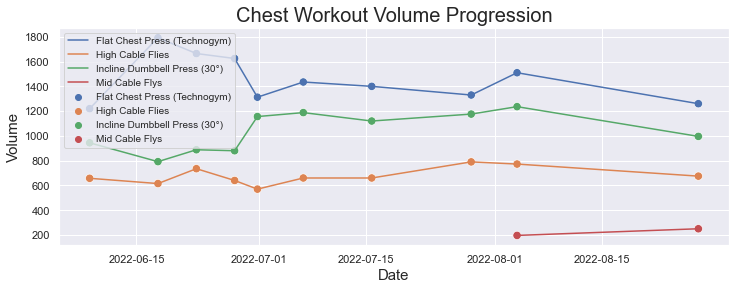

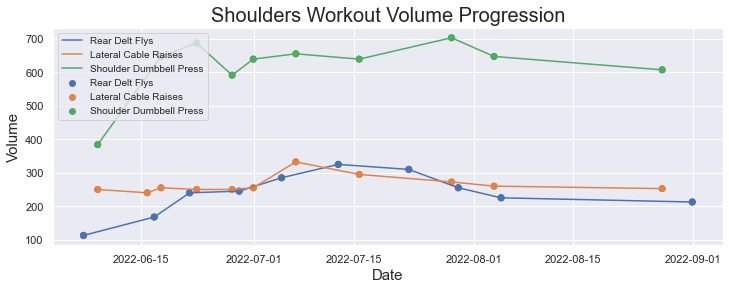

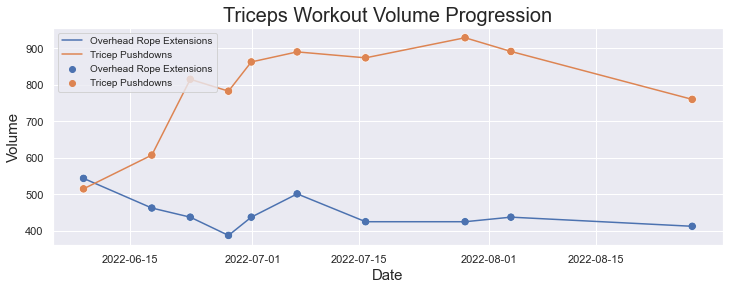

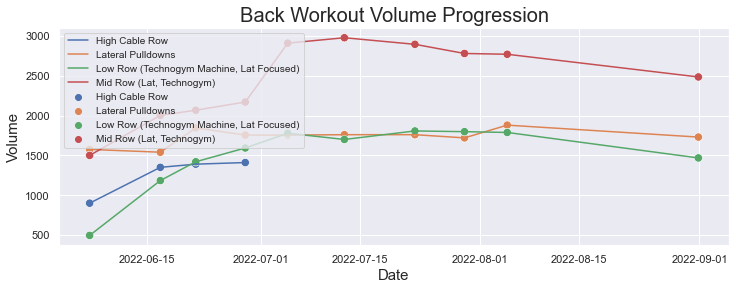

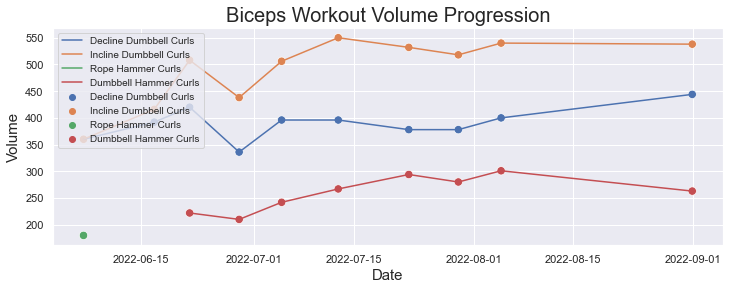

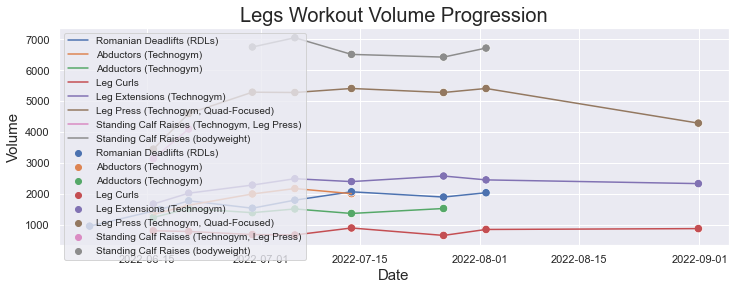

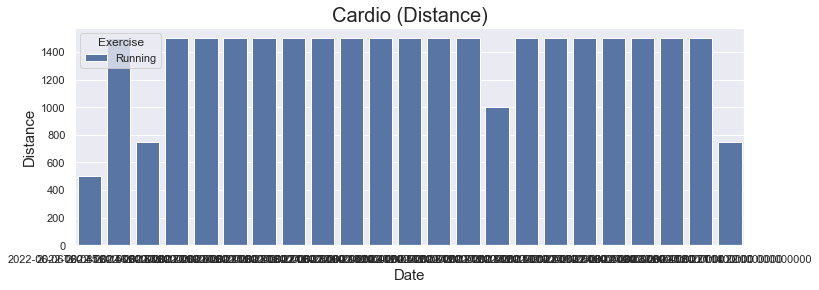

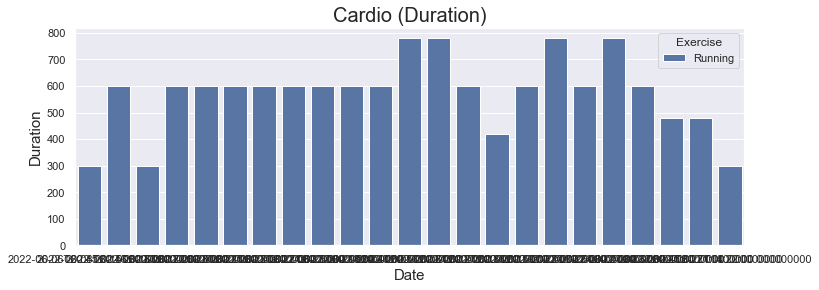

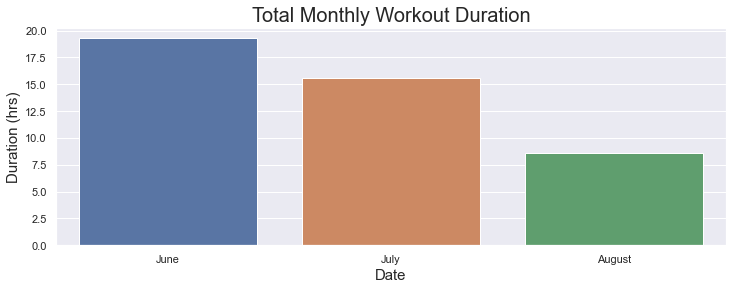

,Workout Start,Duration,Duration (hrs),CGPs
0,June,6000.0,19.300000,38.600000
1,July,5340.0,15.600000,31.200000
2,August,1860.0,8.633333,17.266667


In [18]:
## '''STATISTICS TABLE'''
from texttable import Texttable
t = Texttable()
t.add_rows([['Stats (since June 2022)', 'Value'], 
            ['Total Workouts', no_of_workouts], 
            ['Average Workout Time (mins)', str(int(average_workout_duration)) + ' mins'],
            ['0', 0],
            ['0', 0],
           ])
print(t.draw())


'''VOLUME PLOT'''
plot_volume()

'''CARDIO PLOT'''
plot_cardio(df_cardio)

# Monthly Workout Duration
sns.set_theme(style="darkgrid")
plt.figure(figsize=figsize)
sns.barplot(x='Workout Start', y='Duration (hrs)', data=monthly_workout_duration, ci=None)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Duration (hrs)', fontsize=15)
plt.title('Total Monthly Workout Duration', fontsize=20)
plt.show()
# Display exact CGPs
monthly_workout_duration['CGPs'] = monthly_workout_duration['Duration (hrs)'] * 2
display(monthly_workout_duration)

# TODO: Plot Average Monthly Workout Duration (97mins, 95mins, 103mins, ...)